# List Full Names of all the participants in your team below:
1. Yousuf Aziz
2. Arghya Dutta
3. Daniel Walsh
4. David
5. Jonathan Romano
6. Joseph Mccart
7. Mohit Gokul
8. Rishabh Kumar
9. Yingwei Li
10. 
11. 


Hello Machine Learning Engineer Jokang Team, 

You have been given a data which is obtained from **House Prices** in Buffalo, City. 

Number of Instances: 414 <br>
Number of Attributes: 5 (including the target variable `y`)

Attribute Information: 
  * **y**: Value of the house of unit area in $
  * **f1**: the house age (unit: year)
  * **f2**: the distance to the nearest MRT station (unit: meter)
  * **f3**: the number of convenience stores in the living circle on foot (integer)
  * **f4**: the geographic coordinate, latitude. (unit: degree)
  * **f5**: the geographic coordinate, longitude. (unit: degree)


There are no missing Attribute Values.

Your task is to implement a **Linear Regression model using Gradient Descent Solution** to predict the house price in Buffalo

## Gradient Descent Solution
The **genesis equation** for Linear Regression is of the form:

$y(x,w) = W.x + b$  

* $y(x,w)$ is predicted output,
* $x$ is the Input
* $W = [W_{1}, W_{2}, .. , W_{F}]$ are the parameters to be learned from training samples with $F$ Features
* $b$ is the bias



YOU NEED TO IMPLEMENT an iterative solution to solve for $W$ (Gradient Descent Solution) 

<font color="red">DO NOT USE SKLEARNS LINEAR REGRESSION LIBRARY DIRECTLY.</font>


### **Question:** In the following code cell implement the following:
* Step 1: Import the dataset (HousePriceBuffalo.csv) using Pandas Dataframe (Step 1 Implemented already)
* Step 2: Partition your dataset into training testing and validation using sklearns train_test_split library and split the features and target labels into seperate variables (Step 2 Implemented already)
* Step 3: Scale the features using sklearns min max scaling function (Step 3 Implemented already)
* Step 4: Convert Scaled Features and Labels into numpy arrays with dimensions required by closed form solution (Step 4 Implemented already)
* Step 5: Initialize the learning rate, number of epochs, weight vector, bias scalar and other variables required for tracking cost.
* Step 6: Train with Training Dataset using Gradient Descent Solution
  Iteratively update the weights and biases for each epoch using:
  * Step 6.1: Use genesis equation $\hat{y} = W^{T}.X + b$ where $W$ is the weight array, $X$ is the input features and $\hat{y}$ is the predicted value. (You will have to perform same operation on validation set as well)
  * Step 6.2: Find Mean Squared Error (MSE) Loss Function (L) for training and validation set using predicted value $\hat{y}$ and truth value $y$
    * MSE Train Cost = $\frac{1}{n} \sum_{i=1}^{i=n} (y\_train_{i} - \hat{y}\_train_{i})^{2}$
  * Step 6.3: Find $ \Delta W_{j} = \frac{\delta L}{\delta W_{j}}$ and $ \Delta b = \frac{\delta L}{\delta b}$ where $j = 1$ to $F$(Proof for finding  $\Delta W$ and $\Delta b$ is available in the appendix below)
    * $ \Delta W_{j} = \frac{\delta L}{\delta W_{j}} = \frac{2}{n}\sum_{i=1}^{i=n}(y\_train_{i} - \hat{y}\_train_{i})*x_{ij}$
    * $ \Delta b = \frac{\delta L}{\delta b} = \frac{2}{n}\sum_{i=1}^{i=n}(y\_train_{i} - \hat{y}\_train_{i})$
  * Step 6.4: Update $W$ and $b$ using learning rate($\eta$) as follows:
    - $W_{j} = W_{j} - \eta*\Delta W_{j}$
    - $b = b - \eta*\Delta b$
  * Step 6.5: Store MSE Cost for training and validation in cost tracking lists
* Step 7: Plot validation and training cost vs number of epochs (Already Implemented)
* Step 8: Test using Testing Dataset
  * Step 8.1: Use genesis equation $\hat{y} = W^{T}.X_{test} + b$ where $W$ is the weight array, $X_{test}$ is the input test features and $\hat{y}$ is the predicted value.
  * Step 8.2: Calculate Mean Squared Error (MSE) for Test Dataset
    * MSE Test Cost$ = \frac{1}{n}\sum_{i=1}^{i=n} (y\_test_{i} - \hat{y}\_test_{i})^{2}$ 

## TA Response

In [1]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/AirQualitySeattle.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))
data

# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_val_test, y_train, y_val_test = train_test_split(input, output, test_size = 0.8)
x_val, x_test, y_val, y_test = train_test_split(input, output, test_size = 0.5)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xval = scaler.fit_transform(x_val)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1).T
x_train_arr = sc_xtrain.T
y_val_arr = y_val.to_numpy().reshape(y_val.shape[0],1).T
x_val_arr = sc_xval.T
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1).T
x_test_arr  = sc_xtest.T

# Step 5 already implemented
learningrate = 0.005
epochs = 1000
bias = 0

number_of_features         = x_train_arr.shape[0]
number_of_train_datapoints = x_train_arr.shape[1]
number_of_val_datapoints   = x_val_arr.shape[1]
number_of_test_datapoints  = x_test_arr.shape[1]

weights = np.random.randn(number_of_features,1)

training_cost_track = []
val_cost_track = []

# Step 6
for epoch in range(epochs):
    
    # Step 6.1 y_pred = wT.X + b (For Training and Validation dataset)
    train_pred = np.dot(weights.T, x_train_arr) + bias
    val_pred   = np.dot(weights.T, x_val_arr)   + bias
    
    # Step 6.2 MSE Cost for Training and Validation Dataset
    train_cost = np.sum((train_pred - y_train_arr)**2)/number_of_train_datapoints
    val_cost   = np.sum((val_pred - y_val_arr)**2)/number_of_val_datapoints
    
    # Step 6.3: Calculate derivatives
    dz = train_pred - y_train_arr
    dw = (1/number_of_train_datapoints) * np.dot(x_train_arr, dz.T)
    db = (1/number_of_train_datapoints) * np.sum(dz)
    
    # Step 6.4: update weights and bias
    weights = weights - learningrate * dw
    bias = bias - learningrate * db

    # Step 6.5: Store MSE Cost for training and validation in seperate cost tracking list
    training_cost_track.append(train_cost)
    val_cost_track.append(val_cost)

In [2]:
# Step 8.1: Test using Testing Dataset: Get the predicted values 
test_pred = np.dot(weights.T, x_test_arr) + bias

# Step 8.2: Calculate the MSE for Testing dataset
test_cost = np.sum((test_pred - y_test_arr)**2)/number_of_test_datapoints

## Student Response

In [ ]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/HousePriceBuffalo.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))
data

# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_val_test, y_train, y_val_test = train_test_split(input, output, test_size = 0.8)
x_val, x_test, y_val, y_test = train_test_split(input, output, test_size = 0.5)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xval = scaler.fit_transform(x_val)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1).T
x_train_arr = sc_xtrain.T
y_val_arr = y_val.to_numpy().reshape(y_val.shape[0],1).T
x_val_arr = sc_xval.T
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1).T
x_test_arr  = sc_xtest.T

# Step 5 already implemented
learningrate = 0.005
epochs = 300
bias = 0

number_of_features         = x_train_arr.shape[0]
number_of_train_datapoints = x_train_arr.shape[1]
number_of_val_datapoints   = x_val_arr.shape[1]
number_of_test_datapoints  = x_test_arr.shape[1]

weights = np.random.randn(number_of_features,1)

training_cost_track = []
val_cost_track = []

# Step 6
for epoch in range(epochs):
    
    # Step 6.1 y_pred = wT.X + b (For Training and Validation dataset)
    train_y_pred = np.dot(weights.T, x_train_arr) + bias
    val_y_pred = np.dot(weights.T, x_val_arr) + bias
    
    # Step 6.2 MSE Cost for Training and Validation Dataset
    train_mse_const = (1/number_of_train_datapoints) * np.sum((y_train_arr - train_y_pred) ** 2)
    val_mse_const = (1/number_of_val_datapoints) * np.sum((y_val_arr - val_y_pred) ** 2)

    # Step 6.3: Calculate derivatives
    delta_w = np.zeros((number_of_features, 1))
    for j in range(number_of_features):
      delta_w[j] = -(2/number_of_train_datapoints) * np.sum((y_train_arr - train_y_pred) * x_train_arr[j])
    delta_b = -(2/number_of_train_datapoints) * np.sum((y_train_arr - train_y_pred))
    # Step 6.4: update weights and bias
    weights -= learningrate * delta_w
    bias -= learningrate * delta_b
  
    # Step 6.5: Store MSE Cost for training and validation in seperate cost tracking list
    training_cost_track.append(train_mse_const)
    val_cost_track.append(val_mse_const)
train_y_pred = np.dot(weights.T, x_train_arr) + bias
print(train_y_pred)
print(x_train)

[[40.0606498  22.68358641 41.60093732 34.96326111 29.90368061 42.77917521
  36.76888423 39.08139903 37.28910489 39.40787825 41.72585146 34.4718818
  38.87757978 42.71310058 34.85249587 33.78110907 39.70001045 45.44426303
  37.9599923  42.34429404 34.51013553 25.6554403  39.80732683 40.93409579
  42.14586226 39.9068305  39.7789494  35.65061049 36.86083623 22.45676885
  38.3982751  45.66923968 22.55304891 42.23857607 40.72003078 48.74211864
  24.62061235 33.2012149  32.64005712 33.67734554 30.92242756 42.207664
  37.09236415 30.78528572 43.86883509 36.7888668  31.83465394 40.61563089
  41.73662829 42.21639426 40.19148131 33.93351023 22.04899953 23.73318573
  40.16636777 43.7817426  41.79408253 40.62084893 32.23228779 39.17051683
  32.15677496 41.26757067 30.58915185 39.48339108 22.63827871 40.25556425
  29.28744606 40.25838731 40.54766264 42.4309187  41.85331835 41.66577625
  41.59597969 32.21718523 48.6045176  42.47779534 35.17334523 22.01879439
  33.92607228 43.77797404 29.81404731 40.

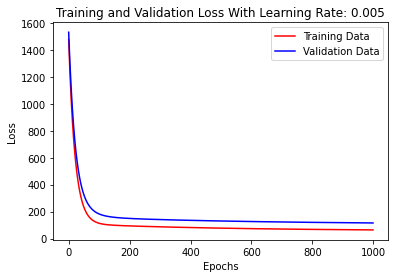

In [ ]:
# Step 7: Plot MSE cost for training and validation set vs number of epochs (Already Implemented)
import matplotlib.pyplot as plt
plt.title('Training and Validation Loss With Learning Rate: ' + str(learningrate))
plt.plot(training_cost_track, color='red', label='Training Data')
plt.plot(val_cost_track, color='blue', label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 8.1: Test using Testing Dataset: Get the predicted values 
y_test_pred = np.dot(weights.T, x_test_arr) + bias

# Step 8.2: Calculate the MSE for Testing dataset
test_mse_const = (1/number_of_test_datapoints) * np.sum((y_test_arr - y_test_pred) ** 2)

print('Training error', train_mse_const)
print('Validation error', val_mse_const)
print('Testing error', test_mse_const)


Training error 64.46527007574976
Validation error 116.01566936370708
Testing error 85.42240960165157


### Appendix (Proof)

![!picture](https://drive.google.com/uc?export=view&id=1MVcYLfEzAlKcumhLiwrsmGSn0-AAK3tg)